In [75]:
import logging
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [76]:
m = 150
d = 75
X = np.random.rand(m, d)

w = np.random.choice([10,-10], (10, 1))
w = np.append(w, np.zeros(d-10))

sigma = 0.1
mu = 0
epsilon = sigma* np.random.randn(m, 1) + mu
y = np.matmul(X, w) + epsilon.T

print(y.shape, X.shape, w.shape, epsilon.shape)
#print(np.matmul(X, w), np.matmul(X, w)+ epsilon.T)
np.savetxt('X.txt', X)
np.savetxt('y.txt', y)

(1, 150) (150, 75) (75,) (150, 1)


In [77]:
X = np.loadtxt("X.txt")
y = np.loadtxt("y.txt")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 70, train_size = 80)

X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, test_size = 50, train_size = 20)

print(X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape,  y_test.shape, X_val.shape, y_val.shape)

(150, 75) (150,) (80, 75) (80,) (50, 75) (50,) (20, 75) (20,)


In [84]:
def lasso(X, y, L, num_iter = 100):
    (num_samp, num_fea) = X.shape
    ### ridge regression to init
    X2 = np.matmul(X.T, X) 
    X2[np.diag_indices_from(X2)] += L
    X2 = np.linalg.inv(X2)
    w = np.matmul(X.T, y)
    w = np.matmul(X2, w)
    #####
    #print(y.shape, w.shape, X.T.shape)
    
    for run in range(num_iter):
        for j in range(num_fea):
            a_j = 2*np.dot(X[:,j],X[:,j])
            
            vec = y- np.matmul(w.T, X.T) + (w*X)[:,j]
            #X2 = w* X
            #vec2 = vec + X2[:,j]  
            c_j = 2*np.dot(X[:,j], vec)

            a = c_j/a_j
            delta = L/a_j
            w[j] = np.sign(a)* max((abs(a) - delta), 0) 
            #print(np.sign(a), abs(a)-delta, abs(a)-delta< 0)
            #print(j, vec, delta, w[j])
    return w

w = lasso(X_train, y_train, 1, num_iter =100)

0.00630957344480193 [0.093543469569187312, 0.08073307913293698, 0.068365690498086343, 0.057436366398293484, 0.047605995878501464, 0.040688838551068481, 0.03618098626342485, 0.034841705330770217, 0.036179510360194324, 0.039838174568778903, 0.044952271990132298, 0.051077910489247799, 0.057725358018638075, 0.064485513516362128, 0.071080451871429723, 0.077092642351304336, 0.082469826664076373, 0.087180447639280262, 0.091184462163604818, 0.094589270001486175]


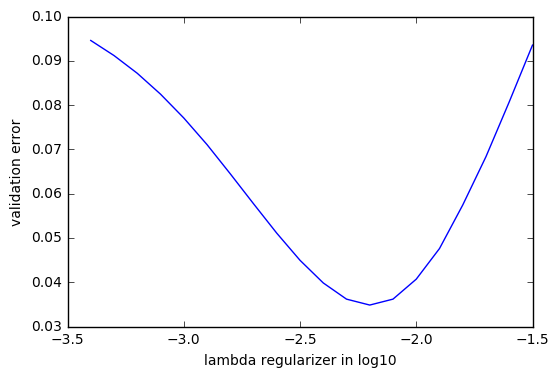

In [88]:
def lambda_graph(X, y, X_val, y_val):
    l = []
    expo = [-1.5-i/10 for i in range(20)]
    lambda_ = [10**e for e in expo]
    #lambda_ = [20, 10, 2, 1, 10e-2, 10e-3, 10e-4]
    #lambda_ = [i for i in range(25)]
    lambda_plot = [np.log10(x) for x in lambda_]
    
    for lamb in lambda_:
        w = lasso(X, y, L = lamb)
        l.append(mean_squared_error(y_val, np.matmul(X_val, w))/2) 
       
    plt.plot(lambda_plot, l)
    plt.xlabel('lambda regularizer in log10')
    plt.ylabel('validation error')
    print(lambda_[l.index(min(l))], l) #best lambda for 100 iterations: ~6e-3 sklearn: ~4e-3
    plt.show()
    
lambda_graph(X_train, y_train, X_val, y_val)

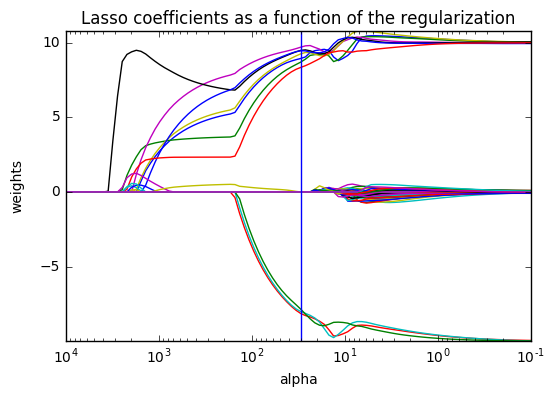

In [90]:
lambdas = np.logspace(-1, 4, 100)
coefs = []
for lamb in lambdas:
    w = lasso(X, y, L = lamb)
    coefs.append(w) 

ax = plt.gca()

ax.plot(lambdas, coefs)
ax.axvline(30)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [ ]:
def homotopy_lasso( )

In [ ]:
def coordinate_min()

In [ ]:
def ridge_regre()